In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
cd /content/drive/My Drive

/content/drive/My Drive


In [3]:
ls

 394499700164290_signed.pdf
 C8_Chethan.vcf
'Colab Notebooks'/
'Getting started.pdf'
 glove.6B.zip
'gods Resume.pdf'
 Hotel_Reviews-515k-hotel-reviews-data-in-europe.csv
 Hotel_Reviews.csv
 Resume12.gdoc
 Resume12.pdf
'Resume (1).gdoc'
'Resume (2).gdoc'
'Resume (3).gdoc'
 Resume.gdoc
 wiki-news-300d-1M.vec.zip


In [4]:
import os
import sys
import numpy as np
import pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

from gensim.models import KeyedVectors

Using TensorFlow backend.


In [5]:
reviews_df = pd.read_csv('Hotel_Reviews.csv')
print(reviews_df.dtypes)

Hotel_Address                                  object
Additional_Number_of_Scoring                    int64
Review_Date                                    object
Average_Score                                 float64
Hotel_Name                                     object
Reviewer_Nationality                           object
Negative_Review                                object
Review_Total_Negative_Word_Counts               int64
Total_Number_of_Reviews                         int64
Positive_Review                                object
Review_Total_Positive_Word_Counts               int64
Total_Number_of_Reviews_Reviewer_Has_Given      int64
Reviewer_Score                                float64
Tags                                           object
days_since_review                              object
lat                                           float64
lng                                           float64
dtype: object


In [0]:
def clean(text):
    '''
    '''
    text = text.lower()
    text = text.replace("ain't", "am not")
    text = text.replace("aren't", "are not")
    text = text.replace("can't", "cannot")
    text = text.replace("can't've", "cannot have")
    text = text.replace("'cause", "because")
    text = text.replace("could've", "could have")
    text = text.replace("couldn't", "could not")
    text = text.replace("couldn't've", "could not have")
    text = text.replace("should've", "should have")
    text = text.replace("should't", "should not")
    text = text.replace("should't've", "should not have")
    text = text.replace("would've", "would have")
    text = text.replace("would't", "would not")
    text = text.replace("would't've", "would not have")
    text = text.replace("didn't", "did not")
    text = text.replace("doesn't", "does not")
    text = text.replace("don't", "do not")
    text = text.replace("hadn't", "had not")
    text = text.replace("hadn't've", "had not have")
    text = text.replace("hasn't", "has not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd", "he would")
    text = text.replace("haven't", "have not")
    text = text.replace("he'd've", "he would have")
    text = text.replace("'s", "")
    text = text.replace("'t", "")
    text = text.replace("'ve", "")
    text = text.replace(".", " . ")
    text = text.replace("!", " ! ")
    text = text.replace("?", " ? ")
    text = text.replace(";", " ; ")
    text = text.replace(":", " : ")
    text = text.replace(",", " , ")
    text = text.replace("´", "")
    text = text.replace("‘", "")
    text = text.replace("’", "")
    text = text.replace("“", "")
    text = text.replace("”", "")
    text = text.replace("\'", "")
    text = text.replace("\"", "")
    text = text.replace("-", "")
    text = text.replace("–", "")
    text = text.replace("—", "")
    text = text.replace("[", "")
    text = text.replace("]","")
    text = text.replace("{","")
    text = text.replace("}", "")
    text = text.replace("/", "")
    text = text.replace("|", "")
    text = text.replace("(", "")
    text = text.replace(")", "")
    text = text.replace("$", "")
    text = text.replace("+", "")
    text = text.replace("*", "")
    text = text.replace("%", "")
    text = text.replace("#", "")
    text = text.replace("\n", " \n ")
    text = text.replace("\n", "")
    text = text.replace("_", " _ ")
    text = text.replace("_", "")
    text = ''.join([i for i in text if not i.isdigit()])

    return text

In [0]:
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values

In [0]:
cleaned_positive_reviews = [clean(r) for r in positive_reviews] 
cleaned_negative_reviews = [clean(r) for r in negative_reviews] 

In [0]:
reviews_df['Positive_Review'] = cleaned_positive_reviews
reviews_df['Negative_Review'] = cleaned_negative_reviews

In [0]:
# Shuffling data
reviews_df = reviews_df.sample(frac=1).reset_index(drop=True)

# Extracting all text
positive_reviews = reviews_df['Positive_Review'].values
negative_reviews = reviews_df['Negative_Review'].values
reviews_text = []

for p,n in zip(positive_reviews, negative_reviews) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(n)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        reviews_text.append(p)
    else : 
        reviews_text.append(n)
        reviews_text.append(p)

In [0]:
training_df = reviews_df.loc[:10000]
positive_reviews_filtered = training_df['Positive_Review'].values
negative_reviews_filtered = training_df['Negative_Review'].values
training_reviews = []
labels = []

for idx,(p,n) in enumerate(zip(positive_reviews_filtered, negative_reviews_filtered)) : 
    if p in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] : 
        training_reviews.append(n)
        labels.append(0)
    elif n in ['na', 'nothing', 'none', 'n a', 'no', 'no positive', 'no negative'] :
        training_reviews.append(p)
        labels.append(1)
    else :
        training_reviews.append(n)
        labels.append(0)
        training_reviews.append(p)
        labels.append(1)

In [0]:
dict1 ={
    'reviews' : training_reviews,
    'labels' : labels
}
sentiment_df = pd.DataFrame.from_dict(dict1)

In [0]:
dict2 ={
    'reviews_text' : reviews_text
}
reviews_text_df = pd.DataFrame.from_dict(dict2)

In [14]:
training_reviews[:10]

[' find nothing everything perfect ',
 ' great hotel with all comforts the super designe and the swimming pool on the roof all very clean and of couse the staff at the reseption very profisionell better you can not make it hight gastronomy ',
 ' your valet parking guys didn t tell me they d gone into zone  london so got  parking fines ',
 ' has the wow factor',
 ' good breakfast staff very helpful great location',
 ' nothing',
 ' great value comfortable hotel close to everywhere',
 ' the room was very small and it doesn t worth the price even the queen bed room is very small the location of the room in a busy streets which the noise of the cars can be heard in the room i don t recommend this hotel to any one ',
 ' the staff they are helpful',
 ' despite booking for  adults and  child at no point was it explained there would be an additional charge for the childs bed to be put in the room this should be explained ']

In [15]:
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(training_reviews)
sequences = tokenizer.texts_to_sequences(training_reviews)

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

MAX_SEQUENCE_LENGTH = 1000

data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)


labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Found 10848 unique tokens.
Shape of data tensor: (16890, 1000)
Shape of label tensor: (16890, 2)


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)
x_test, x_val, y_test, y_val = train_test_split(data, labels, test_size=0.5, random_state=42)

In [31]:
!wget https://drive.google.com/open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq
!unzip wiki-news-300d-1M.vec.zip

--2020-05-08 11:20:05--  https://drive.google.com/open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq
Resolving drive.google.com (drive.google.com)... 74.125.31.101, 74.125.31.139, 74.125.31.138, ...
Connecting to drive.google.com (drive.google.com)|74.125.31.101|:443... connected.
HTTP request sent, awaiting response... 307 Temporary Redirect
Location: https://drive.google.com/file/d/1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq/view?usp=drive_open [following]
--2020-05-08 11:20:05--  https://drive.google.com/file/d/1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq/view?usp=drive_open
Reusing existing connection to drive.google.com:443.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq’

open?id=1xzt06g_xeP     [ <=>                ]  68.20K  --.-KB/s    in 0.006s  

2020-05-08 11:20:05 (11.0 MB/s) - ‘open?id=1xzt06g_xeP1DitFXhJprF5VTwzNEUYhq’ saved [69839]

Archive:  wiki-news-300d-1M.vec.zip
  inflating: wiki-news-300d-1M.vec   


In [32]:
model_ft = KeyedVectors.load_word2vec_format('wiki-news-300d-1M.vec', binary=False)

/usr/local/lib/python3.6/dist-packages/smart_open/smart_open_lib.py:253: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [0]:
import keras

In [34]:
vocabSize = len(word_index) + 1
# Querying SQLlite database to extract needed words embeddings
tokenizer = keras.preprocessing.text.Tokenizer()
tokenizer.fit_on_texts(training_reviews)
vocabSize = len(tokenizer.word_index) + 1
vocabSize

10849

In [35]:
EMBEDDING_DIM = 300
MAX_NUM_WORDS=500
print('Preparing embedding matrix.fast text')

# prepare embedding matrix
num_words = min(MAX_NUM_WORDS, len(word_index) + 1)
print(num_words)
embedding_matrix = np.zeros((vocabSize, EMBEDDING_DIM))
for word, i in word_index.items():
    if i >= MAX_NUM_WORDS:
        continue
    if word in model_ft.vocab:
      embedding_vector = model_ft[word]
      embedding_vector = np.array(embedding_vector)
      if embedding_vector is not None:
          # words not found in embedding index will be all-zeros.
          embedding_matrix[i] = embedding_vector
print(embedding_matrix.shape)

Preparing embedding matrix.fast text
500
(10849, 300)


In [36]:
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import Flatten
from keras.initializers import Constant

print('Training model.')

# define the model
model = Sequential()
model.add(Embedding(vocabSize,
                            EMBEDDING_DIM,
                            embeddings_initializer=Constant(embedding_matrix),
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))
# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['acc'])

# summarize the model
print(model.summary())

model.fit(x_train, y_train,
          batch_size=256,
          epochs=5,
          validation_data=(x_val, y_val))

Training model.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 1000, 300)         3254700   
_________________________________________________________________
flatten_1 (Flatten)          (None, 300000)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               153600512 
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 157,019,694
Trainable params: 153,764,994
Non-trainable params: 3,254,700
________________

In [37]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)

print('Accuracy: %f' % (accuracy))
print('Loss: %f' % (loss))

Accuracy: 0.948135
Loss: 0.120173


In [0]:
#model.most_similar(positive="dinner")
#from keras.preprocessing.text import Tokenizer
model.save_weights("model.h5")

In [0]:
from keras.preprocessing.text import text_to_word_sequence
import keras

In [0]:
reviews = [ str(r) for r in sentiment_df['reviews'].values]
labels = sentiment_df['labels'].values

for idx, review in enumerate(training_reviews):
    words = text_to_word_sequence(review)
    if(len(words) > 40): 
        words = words[:40]
        training_reviews[idx] = ' '.join(words)

oneHotReviews = tokenizer.texts_to_sequences(reviews)
encodedReviews = keras.preprocessing.sequence.pad_sequences(oneHotReviews, maxlen=1000, padding='post')

X_train, X_test, y_train, y_test = train_test_split(encodedReviews, labels, test_size=0.33, random_state=42)

In [41]:
# define neural network
model1 = keras.models.Sequential()
model1.add(keras.layers.Embedding(vocabSize, 300, weights=[embedding_matrix], input_length=1000, trainable=True))
model1.add(keras.layers.Flatten())
model1.add(keras.layers.Dense(1, activation='sigmoid'))
model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
model1.fit(X_train, y_train, epochs=5, verbose=1)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Epoch 1/5
11316/11316 [==============================] - 29s 3ms/step - loss: 0.2919 - acc: 0.8800
Epoch 2/5
11316/11316 [==============================] - 27s 2ms/step - loss: 0.1382 - acc: 0.9535
Epoch 3/5
11316/11316 [==============================] - 27s 2ms/step - loss: 0.0984 - acc: 0.9691
Epoch 4/5
11316/11316 [==============================] - 26s 2ms/step - loss: 0.0745 - acc: 0.9777
Epoch 5/5
11316/11316 [==============================] - 26s 2ms/step - loss: 0.0572 - acc: 0.9836


In [0]:
#  loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
# print('Test Loss: {}'.format(loss))
# print('Test Accuracy: {}'.format(accuracy))

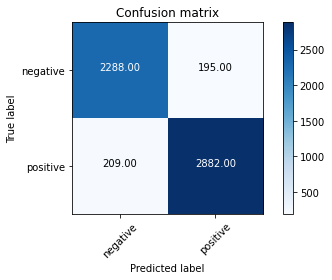

In [43]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import tensorflow.contrib.keras as keras
import matplotlib.pyplot as plt
import os
import sys
import pickle
import itertools
import gensim
from sklearn.model_selection import train_test_split
from numpy import zeros
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.text import text_to_word_sequence
from gensim.models import Word2Vec
predictions = model1.predict_classes(X_test)

cm = confusion_matrix(y_test, predictions, labels=[0,1])
title = 'Confusion matrix'
cmap = plt.cm.Blues
classes=["negative","positive"]
plt.imshow(cm, interpolation='nearest', cmap=cmap)
plt.title(title)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

fmt = '.2f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()
plt.show()

In [44]:
report = classification_report(y_test, predictions, target_names=['0','1'])
print(report)

              precision    recall  f1-score   support

           0       0.92      0.92      0.92      2483
           1       0.94      0.93      0.93      3091

    accuracy                           0.93      5574
   macro avg       0.93      0.93      0.93      5574
weighted avg       0.93      0.93      0.93      5574

